<a href="https://colab.research.google.com/github/dharani2002/dharani2002/blob/main/dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [10]:
from google.colab import files


uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [11]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [12]:
!kaggle datasets download -d razinw/dog-vs-cat

 98% 404M/412M [00:03<00:00, 121MB/s]
100% 412M/412M [00:03<00:00, 121MB/s]


In [13]:
zip_ref = zipfile.ZipFile('/content/dog-vs-cat.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [14]:
len(os.listdir('/content/dogvscat/test/0'))

25

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/dogvscat/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 500 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dogvscat/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 50 images belonging to 2 classes.


In [18]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
16/16 [==============================] - 29s 2s/step - loss: 0.7541 - accuracy: 0.4860 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/25
16/16 [==============================] - 23s 1s/step - loss: 0.6918 - accuracy: 0.5320 - val_loss: 0.6923 - val_accuracy: 0.6200
Epoch 3/25
16/16 [==============================] - 23s 1s/step - loss: 0.6893 - accuracy: 0.5480 - val_loss: 0.6912 - val_accuracy: 0.5600
Epoch 4/25
16/16 [==============================] - 23s 1s/step - loss: 0.6819 - accuracy: 0.5520 - val_loss: 0.6949 - val_accuracy: 0.5600
Epoch 5/25
16/16 [==============================] - 24s 1s/step - loss: 0.6812 - accuracy: 0.5780 - val_loss: 0.6889 - val_accuracy: 0.6000
Epoch 6/25
16/16 [==============================] - 23s 1s/step - loss: 0.6665 - accuracy: 0.6040 - val_loss: 0.7608 - val_accuracy: 0.5000
Epoch 7/25
16/16 [==============================] - 24s 2s/step - loss: 0.6547 - accuracy: 0.6340 - val_loss: 0.7340 - val_accuracy: 0.5400
Epoch 8/25
16/16 [==

In [ ]:
!pip install -q keras


In [20]:
import numpy as np
import tensorflow as tf
from keras.utils import load_img, img_to_array
test_image = load_img('/content/dogvscat/test/0/258.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 145ms/step
cat


In [22]:
import numpy as np
import tensorflow as tf
from keras.utils import load_img, img_to_array
test_image = load_img('/content/dogvscat/test/1/258.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 31ms/step
dog


In [24]:
!pip install -q lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [25]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer()



  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


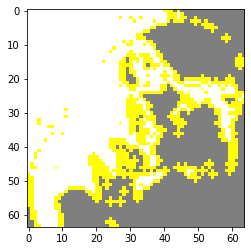

In [26]:
explanation = explainer.explain_instance(test_image[0], cnn.predict, top_labels=2, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
image_boundry = mark_boundaries(temp/2 + 0.5, mask)
plt.imshow(image_boundry)
plt.savefig('LIME_image.png')

In [27]:
import pandas as pd

features = explanation.local_exp[explanation.top_labels[0]]

df = pd.DataFrame(features, columns=['feature_index', 'importance_score'])
df.set_index('feature_index', inplace=True)
print(df)


               importance_score
feature_index                  
12                     0.062900
17                     0.042587
8                      0.035089
0                      0.026801
11                     0.024914
6                     -0.024337
2                      0.023516
28                     0.023459
18                     0.021410
19                     0.019057
5                     -0.014655
33                    -0.010975
13                     0.010435
7                      0.010270
3                      0.008515
15                     0.008426
9                      0.007737
14                    -0.007731
30                     0.007295
4                     -0.006645
21                     0.006052
25                     0.005945
31                     0.005761
27                     0.005046
24                     0.004522
32                     0.004094
23                    -0.004066
10                    -0.003634
1                      0.003454
20      

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


<Figure size 720x576 with 0 Axes>

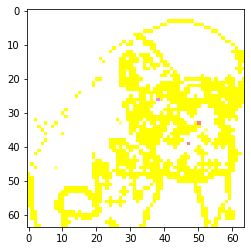

<Figure size 720x576 with 0 Axes>

In [41]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(test_image[0], cnn.predict, top_labels=1, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
heatmap = mark_boundaries(temp/2 + 0.5, mask)
plt.imshow(heatmap)

plt.figure(figsize=(10,8))
#plt.imshow(explanation.as_map())


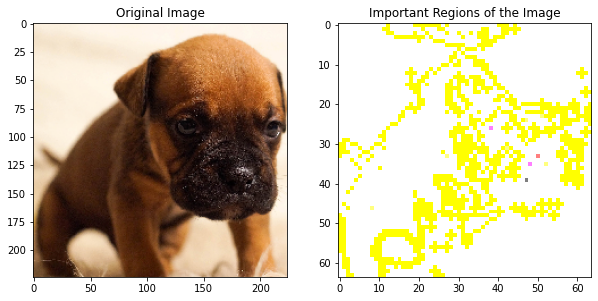

    feature  importance_score
0        18          0.064013
1        14          0.058040
3         0          0.036460
4        13          0.034237
5        27          0.033678
6         8          0.032752
7         3          0.032511
8        19          0.026678
13       20          0.012432
17        9          0.006935
18       32          0.006718
19       21          0.005455
23       25          0.003272
26        4          0.002952
27       15          0.002853
28       24          0.002818
29       17          0.001338
31       11          0.000404
32        7          0.000189
30       29         -0.000629
25        5         -0.003031
24       10         -0.003116
22       23         -0.004804
21       12         -0.005130
20       30         -0.005165
16        6         -0.010282
15       28         -0.010934
14        1         -0.012257
12        2         -0.012784
11       31         -0.016368
10       22         -0.019878
9        16         -0.025675
2        2

In [42]:
import tensorflow as tf
from keras.utils import load_img, img_to_array
img_path = '/content/dogvscat/test/1/258.jpg'
img =load_img(img_path, target_size=(224, 224))
img_arr =img_to_array(img)
img_arr /= 255.
img_arr = np.expand_dims(img_arr, axis=0)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
heatmap = mark_boundaries(temp / 2 + 0.5, mask)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_arr[0])
ax[0].set_title('Original Image')
ax[1].imshow(heatmap)
ax[1].set_title('Important Regions of the Image')
plt.show()

scores = dict(explanation.local_exp[explanation.top_labels[0]])
df = pd.DataFrame(list(scores.items()), columns=['feature', 'importance_score'])
df = df.sort_values('importance_score', ascending=False)
print(df)


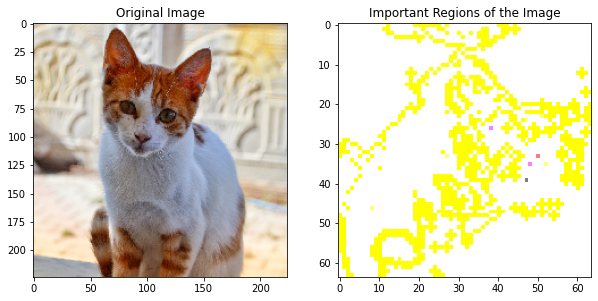

    feature  importance_score
0        18          0.064013
1        14          0.058040
3         0          0.036460
4        13          0.034237
5        27          0.033678
6         8          0.032752
7         3          0.032511
8        19          0.026678
13       20          0.012432
17        9          0.006935
18       32          0.006718
19       21          0.005455
23       25          0.003272
26        4          0.002952
27       15          0.002853
28       24          0.002818
29       17          0.001338
31       11          0.000404
32        7          0.000189
30       29         -0.000629
25        5         -0.003031
24       10         -0.003116
22       23         -0.004804
21       12         -0.005130
20       30         -0.005165
16        6         -0.010282
15       28         -0.010934
14        1         -0.012257
12        2         -0.012784
11       31         -0.016368
10       22         -0.019878
9        16         -0.025675
2        2

In [43]:
import tensorflow as tf
from keras.utils import load_img, img_to_array
img_path = '/content/dogvscat/test/0/258.jpg'
img =load_img(img_path, target_size=(224, 224))
img_arr =img_to_array(img)
img_arr /= 255.
img_arr = np.expand_dims(img_arr, axis=0)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
heatmap = mark_boundaries(temp / 2 + 0.5, mask)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_arr[0])
ax[0].set_title('Original Image')
ax[1].imshow(heatmap)
ax[1].set_title('Important Regions of the Image')
plt.show()

scores = dict(explanation.local_exp[explanation.top_labels[0]])
df = pd.DataFrame(list(scores.items()), columns=['feature', 'importance_score'])
df = df.sort_values('importance_score', ascending=False)
print(df)


In [52]:
import tensorflow as tf
from keras.backend import one_hot, reshape
from keras.losses import binary_crossentropy
from keras.utils import load_img, img_to_array
# Define the adversarial attack function
def adversarial_pattern(image, label, model):
    loss_object = binary_crossentropy(label, model(image))
    gradient = K.gradients(loss_object, image)
    signed_grad = K.sign(gradient)
    return signed_grad

# Load an image to attack
test_image = load_img(
    '/content/dogvscat/test/0/258.jpg', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the true label of the test image
true_label = training_set.class_indices['0']
label = K.one_hot(indices=true_label, num_classes=2)
label = K.reshape(label, (1, 2))

# Get the adversarial perturbation
perturbation = adversarial_pattern(test_image, label, cnn)
eps = 0.05
adversarial = test_image + eps * perturbation.numpy()

# Make a prediction on the adversarial image
adversarial_prediction = cnn.predict(adversarial)

# Print the true label and the predicted label for the test and adversarial images
if true_label == 1:
    print('True label: dog')
else:
    print('True label: cat')
if adversarial_prediction[0][0] >= 0.5:
    print('Adversarial prediction: dog')
else:
    print('Adversarial prediction: cat')

ValueError: ignored